# Test webcam capture

I'm using opencv to do webcam image capture.

Note: to get this to work I had to uninstall the conda version of opencv, then install the pip version.


## Take an image, save it to file and display it

image size: (480, 640, 3)


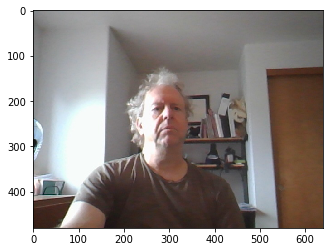

In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

cam = cv2.VideoCapture(0)
retval, frame = cam.read()
if retval != True:
    raise ValueError("Can't read frame")
cam.release()

cv2.imwrite('img2.jpg', frame)
# cv2.imshow("img1", frame) # causes crash
img = mpimg.imread('img2.jpg')
print('image size:',img.shape)
plt.imshow(img);

## Time the image capture process


On my HP Spectre X360:
- Webcam object takes about 1 sec to create.
- Each capture & image file write takes about 12ms.

In [23]:
import time
import numpy as np

imagedir = './images/'

starttime = time.time()
cam = cv2.VideoCapture(0)
print('time to create cam object (s): %1.2f'%(time.time() - starttime))

sleeptime = 0.2
numimages = 50
starttime = time.time()
for i in range(numimages):
    retval, frame = cam.read()
    cv2.imwrite(imagedir+'testimage.jpg', frame)
    time.sleep(sleeptime)
    
cam.release()
    
testdur = time.time()-starttime
print('Image capture & write:')
print('  total duration (s): %1.2f'%(testdur))
print('  capture time: %1.3f'%((testdur-sleeptime*numimages)/numimages))


time to create cam object (s): 1.12
Image capture & write:
  total duration (s): 10.60
  capture time: 0.012


## Find all image capture devices 

In [14]:
import cv2

devnum = []
testrange = 10

for i in range(testrange):
    cam = cv2.VideoCapture(i)
    retval, frame = cam.read()
    if retval:
        devnum.append(i)
        print('device:',i)
        print('  CAP_PROP_GUID:',cam.get(cv2.CAP_PROP_GUID))
        print('  CAP_PROP_MODE:',cam.get(cv2.CAP_PROP_MODE))
        print('  CAP_PROP_SETTINGS:',cam.get(cv2.CAP_PROP_SETTINGS))
        print('  CAP_PROP_FRAME_HEIGHT:',cam.get(cv2.CAP_PROP_FRAME_HEIGHT))
        print('  CAP_PROP_FRAME_WIDTH:',cam.get(cv2.CAP_PROP_FRAME_WIDTH))
        print()
        cam.release()

print('devices found:',devnum)
    

device: 0
  CAP_PROP_GUID: -1.0
  CAP_PROP_MODE: 0.0
  CAP_PROP_SETTINGS: -1.0
  CAP_PROP_FRAME_HEIGHT: 480.0
  CAP_PROP_FRAME_WIDTH: 640.0

devices found: [0]


## OpenCV device properties

In [11]:
list(filter(lambda s: 'CAP_' in s, dir(cv2)))

['CAP_ANDROID',
 'CAP_ANY',
 'CAP_ARAVIS',
 'CAP_AVFOUNDATION',
 'CAP_CMU1394',
 'CAP_DC1394',
 'CAP_DSHOW',
 'CAP_FFMPEG',
 'CAP_FIREWARE',
 'CAP_FIREWIRE',
 'CAP_GIGANETIX',
 'CAP_GPHOTO2',
 'CAP_GSTREAMER',
 'CAP_IEEE1394',
 'CAP_IMAGES',
 'CAP_INTELPERC',
 'CAP_INTELPERC_DEPTH_GENERATOR',
 'CAP_INTELPERC_DEPTH_MAP',
 'CAP_INTELPERC_GENERATORS_MASK',
 'CAP_INTELPERC_IMAGE',
 'CAP_INTELPERC_IMAGE_GENERATOR',
 'CAP_INTELPERC_IR_GENERATOR',
 'CAP_INTELPERC_IR_MAP',
 'CAP_INTELPERC_UVDEPTH_MAP',
 'CAP_INTEL_MFX',
 'CAP_MSMF',
 'CAP_OPENCV_MJPEG',
 'CAP_OPENNI',
 'CAP_OPENNI2',
 'CAP_OPENNI2_ASUS',
 'CAP_OPENNI_ASUS',
 'CAP_OPENNI_BGR_IMAGE',
 'CAP_OPENNI_DEPTH_GENERATOR',
 'CAP_OPENNI_DEPTH_GENERATOR_BASELINE',
 'CAP_OPENNI_DEPTH_GENERATOR_FOCAL_LENGTH',
 'CAP_OPENNI_DEPTH_GENERATOR_PRESENT',
 'CAP_OPENNI_DEPTH_GENERATOR_REGISTRATION',
 'CAP_OPENNI_DEPTH_GENERATOR_REGISTRATION_ON',
 'CAP_OPENNI_DEPTH_MAP',
 'CAP_OPENNI_DISPARITY_MAP',
 'CAP_OPENNI_DISPARITY_MAP_32F',
 'CAP_OPENNI_GENERA